# Systemtechnische Methoden

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> Umsetzungsphasen unterscheiden </li>
        <li> Sensitivitätsanalysen für variable Parameter einsetzen </li>
    </ul>
</div>

Bibliotheken für python

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


Grafikparameter für die Diagramme festlegen:

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Motivation

*„10% kann man holen mit den Energieeffizienzklassen, viel mehr mit Systemanalyse, aber schwieriger, da man das nicht im Katalog auswählen kann und mehr Know-How nötig ist“*
<br>
ECPE Kongress 2016, Diskussionsrunde „Energieeffiziente Antriebe in der Industrie“

**AUFGABE**
Sammeln Sie: wann ergibt sich trotz hoher Einzeleffizienzen eine schlechte Gesamteffizienz?

*Antwort*...

### Systemtechnik: Methoden, um systematisch mit Komplexität umzugehen

![SYEwald](../img/SYEwald.png)

## Phasenmodell: Von der Idee zur Umsetzung

![idee-umsetzung](../img/idee-zur-umsetzung.png)

1. Ideen sammeln
2. Ideen bewerten
 - Grün: Jetzt weiterverfolgen
 - Gelb: Vielleicht später weiterverfolgen
 - Rot: Nicht weiterverfolgen
3. Vorstudie: funktioniert die Idee?
 - wenig Aufwand
 - Literatur recherchieren
 - einfache Messungen
 - einfache Experimente
 - dann entscheiden: weiterverfolgen (grün), weiter untersuchen (gelb) oder aufhören (rot)
4. Pilotstudie: funktioniert die Idee in einer ersten Umsetzung?
 - mehr Aufwand
 - genaue Messungen
 - Prototypen von energieeffizienteren Geräten oder Anlagen
 - Prototypen von Energieabschaltungen
 - dann entscheiden: weiterverfolgen (grün), weiter untersuchen (gelb) oder aufhören (rot)
5. Idee umsetzen
 - der ganze Aufwand (Invest, Zeit, Risiko)
 - Leute schulen
 - alles zugehörige umrüsten

## Charakter einer Vorstudie

- **Dauer**: mehrere Wochen bis mehrere Monate
- **Ressourcen**: kleines Sachmittelbudget, d.h. im Wesentlichen bestehende Messtechnik und bestehende Simulationsumgebunden, Literatur, Expertenbefragung, Konferenz-/Messebesuche, ...
- **Ziel**: Klärung, ob Thema der Vorstudie umsetzbar und Aufzeigen von Ressourcen (Budget, Mitarbeiter, Zeit) für Konzeptstudie
- **Entscheidung**: 
 - **Beenden des Themas**, da z. B. nicht machbar oder zu teuer oder nicht interessant für das eigene Geschäfts-/Forschungsfeld
 - **Verlängerung**, da z. B. weitere Messungen an bestehenden Anlagen oder weitere Simulationsvarianten aussichtsreich
 - **Start einer Konzeptstudie** mit erster Umsetzung (Pilot), bei Produkt Aufbau eines oder mehrerer Prototypen

![konzeptionell-details](../img/konzeptionell-details.png)

**Beispiele für frühe Fragestellungen mit hohem konzeptionellem Anteil**: 
- 2009 Evaluation der Wirtschaftlichkeit von Batteriespeichersystemen an netzgekoppelten Photovoltaikanlagen
- 2019 Potenziale für recyclingfreundliche Elektronik für energieeffiziente Energiesysteme

**Beispiele für späte Fragestellungen mit geringem konzeptionellem Anteil (Konzept bereits in Literatur klar)**
- 2020 Evaluation der Wirtschaftlichkeit von Batteriespeichersystemen an netzgekoppelten Photovoltaikanlagen mit Cloud-Speicher
- 2020 Optimierter Algorithmus für die Beleuchtungssteuerung bestimmter Hersteller

**SYE Projektaufgabe als Vorstudie**

Ziel ist, Energieeffizienz zu analysieren für fiktive, typische Anwendungsfälle<br>
Wie wird die Betrachtung „typisch“?
- Durch aus statistischer Sicht typische Randbedingungen
- Durch nachvollziehbare Annahmen
- Durch Beachtung verschiedener Perspektiven
 - Betreiber- / Inhaberperspektive: welcher Nutzen ergibt sich?
 - Nutzerperspektive: was haben die Nutzer konkret davon?
 - Herstellerperspektive: welche Produkte könnte man anbieten, die auch für andere, ähnliche, Kunden interessant sind?
 - Energieberaterperspektive: welche Maßnahme(n) verbessern messbar deutlich die Energieeffizienz übers Jahr?
 - Politikperspektive: wie viel CO2 wird eingespart?

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Überlegen Sie, welche Messtechnik, welches Personal notwendig wäre, um eine erste Pilotstudie für Ihr Projekt, basierend auf den Ergebnissen aus SYE, durchzuführen. Wenn Sie mit 50.000-100.000 Euro pro Vollzeit-Personen-Äquivalent (Brutto) rechnen, welcher Umfang ergibt sich dann?
</div>

*Antwort:...*

## Sensitivitätsanalysen - wozu?

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Parameter und Annahmen in Ihren Projekten unterliegen großen Unsicherheiten oder großen Schwankungen? Wie könnte hier eine Sensitivitätsanalyse helfen?
</div>

*Antwort:...*

### Sensitivität

Sensitivität = Empfindlichkeit

Wie stark hängt eine (Investitions-)Entscheidung von einem der wichtigen Einflussfaktoren ab?

Beispiele:
- Lohnt sich ein teurer Computer, der schneller rechnen kann?
- Reicht es eventuell schon, nur die Hälfte der Lampen zu tauschen? Wie viele müsste man tauschen, damit es sich lohnt?
- Ist die Investition auch dann sinnvoll, wenn ich nur einen Zeithorizont von 5 Jahren annehme oder gar nur von 2 Jahren?

<AxesSubplot:title={'center':'t CO$_2$ GWP'}>

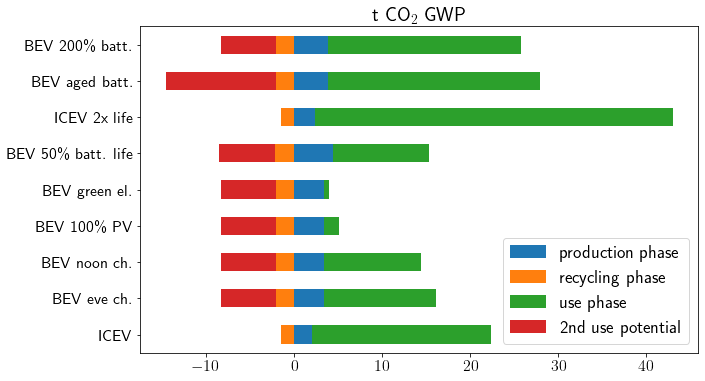

In [3]:
cat = ['ICEV', 'BEV eve ch.', 'BEV noon ch.', 'BEV 100\% PV', 'BEV green el.', 'BEV 50\% batt. life', 'ICEV 2x life', 'BEV aged batt.', 'BEV 200\% batt.']
icev = [1.957, -1.54878, 20.33848, 0]
bev_eve_ch = [3.415,-2.03819,12.6510439635,-6.3]
bev_noon_ch = [3.415,-2.03819,10.9722128043,-6.3]
bev_100pc_pv = [3.415,-2.03819,1.6695608,-6.3]
bev_green_el = [3.415,-2.03819,0.468,-6.3]
bev_50pc_batt_life = [4.355,-2.22479,10.9722128043,-6.3]
icev_2x_life = [2.347,-1.54878,40.67696,0]
bev_aged_batt = [3.805,-2.03819,24.13886817,-12.6]
bev_200pc_batt_life = [3.805,-2.03819,21.9444256087,-6.3]
data = {'t CO$_2$ GWP': cat,
       'production phase': [icev[0],bev_eve_ch[0],bev_noon_ch[0],bev_100pc_pv[0],bev_green_el[0], bev_50pc_batt_life[0], icev_2x_life[0], bev_aged_batt[0], bev_200pc_batt_life[0]], 
       'recycling phase': [icev[1],bev_eve_ch[1],bev_noon_ch[1],bev_100pc_pv[1],bev_green_el[1], bev_50pc_batt_life[1], icev_2x_life[1], bev_aged_batt[1], bev_200pc_batt_life[1]], 
       'use phase': [icev[2],bev_eve_ch[2],bev_noon_ch[2],bev_100pc_pv[2],bev_green_el[2], bev_50pc_batt_life[2], icev_2x_life[2], bev_aged_batt[2], bev_200pc_batt_life[2]],
       '2nd use potential': [icev[3],bev_eve_ch[3],bev_noon_ch[3],bev_100pc_pv[3],bev_green_el[3], bev_50pc_batt_life[3], icev_2x_life[3], bev_aged_batt[3], bev_200pc_batt_life[3]],
       }
df = pd.DataFrame(data, index = cat)
df.plot.barh(stacked = True, title = 't CO$_2$ GWP')

Das Diagramm zeigt Daten aus {cite:p}`may_influence_2019`.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wann ist ein SMART mit Verbrennungsmotor (ICEV) von der Klimabilanz (GWP = global warming potential) her besser als ein batterieelektrisches Fahrzeug (BEV)?
</div>

*Antwort:...*

Für eine klassische Darstellung hier noch ein Beispiel mit fiktiven Werten:

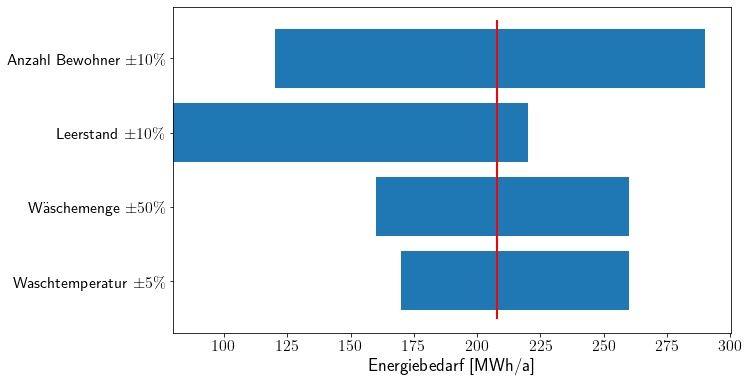

In [4]:
cat2 = ['Anzahl Bewohner $\pm 10\%$','Leerstand $\pm 10\%$', 'Wäschemenge $\pm 50\%$', 'Waschtemperatur $\pm 5\%$']
base_val = 208
real_rent_esc = [120,290]
vacancy_rate = [80,220]
inflation = [160,260]
discount_rate = [170,260]
plt.barh(y = cat2, 
         left = [real_rent_esc[0], vacancy_rate[0], inflation[0],
                discount_rate[0]],
         width = [real_rent_esc[1]-real_rent_esc[0], 
                  vacancy_rate[1]-vacancy_rate[0],
                 inflation[1]-inflation[0],
                 discount_rate[1]-discount_rate[0]])
plt.gca().invert_yaxis()
plt.xlabel('Energiebedarf [MWh/a]')
plt.plot([base_val,base_val],[-0.5,3.5],'r-')

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welcher Parameter beeinflusst den Energiebedarf am stärksten?
</div>

*Antwort:...*

# Literatur

```{bibliography}
:filter: docname in docnames
```